# Task -1 Titanic Classification

In [456]:
# Import library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings. filterwarnings('ignore')
from pandas import Series, DataFrame

In [457]:
# Load the data
df = pd.read_csv('Titanic dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [458]:
# Find the Shape of the data
df.shape

(1309, 12)

In [459]:
# Find the length of the data
len(df)

1309

In [460]:
# Data types of the dataframe
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [461]:
# Check the duplicates
df.duplicated().sum()

0

In [462]:
# Check the null values
null_value =df.isna().sum()
null_value

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [463]:
# Find the percentage of null value
df.isnull().sum().sort_values(ascending=False)*100/len(df)

Cabin          77.463713
Age            20.091673
Embarked        0.152788
Fare            0.076394
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
dtype: float64

In [464]:
# Drop the cabin column
df.drop(columns = 'Cabin', axis = 1, inplace = True)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [465]:
# Clean the Age column by taking mean
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Age']

0       22.000000
1       38.000000
2       26.000000
3       35.000000
4       35.000000
          ...    
1304    29.881138
1305    39.000000
1306    38.500000
1307    29.881138
1308    29.881138
Name: Age, Length: 1309, dtype: float64

In [466]:
# Clean the Embarked column by taking mode
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df['Embarked']

0       S
1       C
2       S
3       S
4       S
       ..
1304    S
1305    C
1306    S
1307    S
1308    C
Name: Embarked, Length: 1309, dtype: object

In [467]:
# Clean the Fare column by taking mean
df['Fare'].fillna(df['Fare'].mean(), inplace=True)
df['Fare']

0         7.2500
1        71.2833
2         7.9250
3        53.1000
4         8.0500
          ...   
1304      8.0500
1305    108.9000
1306      7.2500
1307      8.0500
1308     22.3583
Name: Fare, Length: 1309, dtype: float64

In [468]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [469]:
# Identify the columns category by different datatypes
Category_column = df.select_dtypes(include=['object','category']).columns.tolist()
print("Categorical Columns:")
print(Category_column)

Numerical_column = df.select_dtypes(include=['int64','float64']).columns.tolist()
print("Numerical Columns:")
print(Numerical_column)

Categorical Columns:
['Name', 'Sex', 'Ticket', 'Embarked']
Numerical Columns:
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [470]:
selected_column = df.loc[:,Numerical_column]
selected_column

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.000000,1,0,7.2500
1,2,1,1,38.000000,1,0,71.2833
2,3,1,3,26.000000,0,0,7.9250
3,4,1,1,35.000000,1,0,53.1000
4,5,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,0,3,29.881138,0,0,8.0500
1305,1306,1,1,39.000000,0,0,108.9000
1306,1307,0,3,38.500000,0,0,7.2500
1307,1308,0,3,29.881138,0,0,8.0500


In [471]:
# Find the mean of the columns
Means = selected_column.mean()
Means

PassengerId    655.000000
Survived         0.377387
Pclass           2.294882
Age             29.881138
SibSp            0.498854
Parch            0.385027
Fare            33.295479
dtype: float64

In [472]:
# Find the mode of the columns
modes = selected_column.mode().iloc[0]
modes

PassengerId     1.000000
Survived        0.000000
Pclass          3.000000
Age            29.881138
SibSp           0.000000
Parch           0.000000
Fare            8.050000
Name: 0, dtype: float64

In [473]:
# Find the median of the columns
median = selected_column.median()
median

PassengerId    655.000000
Survived         0.000000
Pclass           3.000000
Age             29.881138
SibSp            0.000000
Parch            0.000000
Fare            14.454200
dtype: float64

In [474]:
# Find the std_deviation of the columns
std_deviation = selected_column.std()
std_deviation

PassengerId    378.020061
Survived         0.484918
Pclass           0.837836
Age             12.883193
SibSp            1.041658
Parch            0.865560
Fare            51.738879
dtype: float64

In [475]:
selected_column.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,12.883193,1.041658,0.865560,51.738879
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,29.881138,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [476]:
# Select features and target variable
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
1304,3,male,29.881138,0,0,8.0500,S
1305,1,female,39.000000,0,0,108.9000,C
1306,3,male,38.500000,0,0,7.2500,S
1307,3,male,29.881138,0,0,8.0500,S


In [477]:
y

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    1
1306    0
1307    0
1308    0
Name: Survived, Length: 1309, dtype: int64

In [478]:
df.describe(include='O')

,Name,Sex,Ticket,Embarked
count,1309,1309,1309,1309
unique,1307,2,929,3
top,"Connolly, Miss. Kate",male,CA. 2343,S
freq,2,843,11,916


In [479]:
gender=df['Sex'].value_counts()
gender

Sex
male      843
female    466
Name: count, dtype: int64

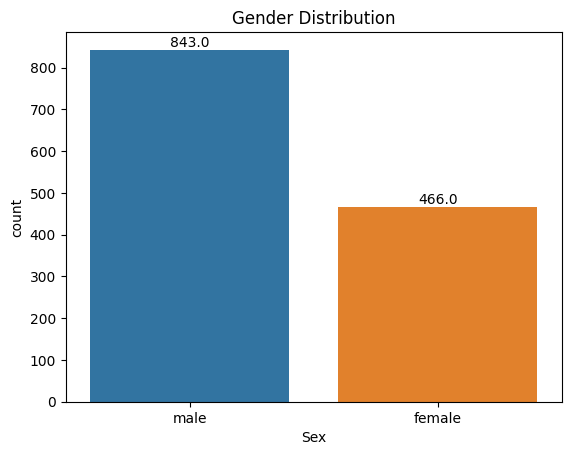

In [480]:
# Create the countplot for Gender
gender_c = sns.countplot(x=df['Sex'])

# Add count labels near the bars
for p in gender_c.patches:
    gender_c.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.title("Gender Distribution")
# Show the plot
plt.show()


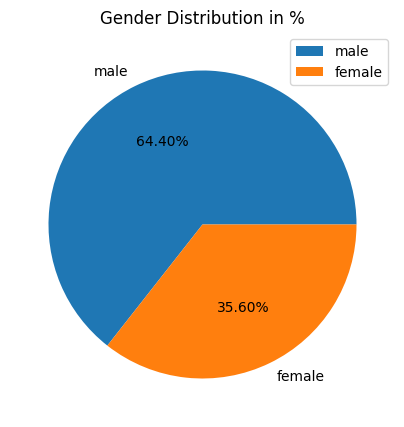

In [481]:
plt.figure(figsize=(5,5))
plt.pie(gender.values,labels=gender.index, autopct='%.2f%%' )
plt.title("Gender Distribution in %")
plt.legend()
plt.show()


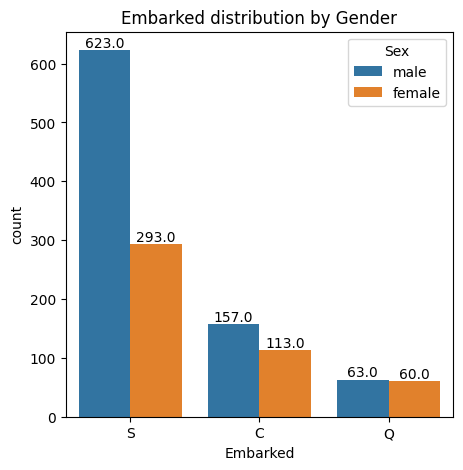

In [482]:
plt.figure(figsize=(5, 5))
Embarked = sns.countplot(x=df[ 'Embarked'],hue=df['Sex'])

# Add count labels near the bars
for p in Embarked.patches:
    Embarked.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.title("Embarked distribution by Gender")
plt.show()

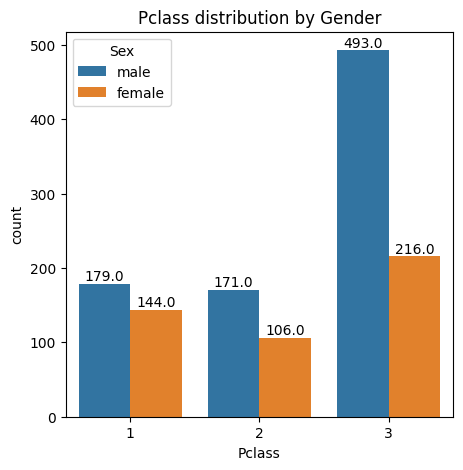

In [483]:
plt.figure(figsize=(5, 5))
pclass = sns.countplot(x=df['Pclass'], hue=df['Sex'])

for p in pclass.patches:
    pclass.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.title("Pclass distribution by Gender")
plt.show()

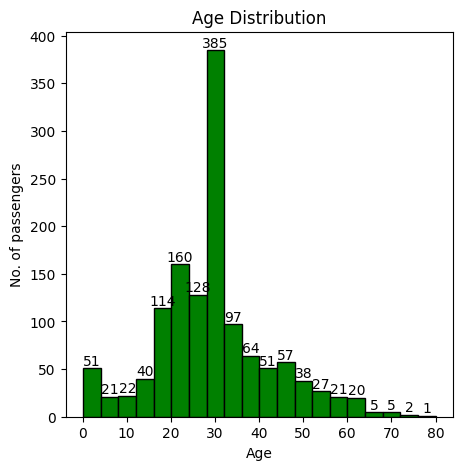

In [484]:
# Create a histogram
plt.figure(figsize=(5, 5))
n, bins, patches = plt.hist(df['Age'], bins=20, color='green', edgecolor='black')

for count, patch in zip(n, patches):
    plt.text(patch.get_x() + patch.get_width() / 2., count, str(int(count)), ha='center', va='bottom')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('No. of passengers')
plt.title('Age Distribution')

# Show the plot
plt.show()


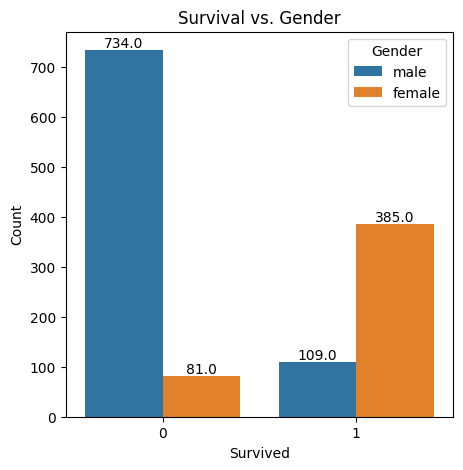

In [485]:
# Create a stacked bar plot
plt.figure(figsize=(5, 5))
ex = sns.countplot(x='Survived', hue='Sex', data=df)

for p in ex.patches:
    ex.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    
# Set labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival vs. Gender')

# Show the plot
plt.legend(title='Gender')
plt.show()

In [486]:
# Let's start by adding a new column to define alone

# add the parent/child column with the sibsp column

df['Alone'] =  df.Parch + df.SibSp
df['Alone']


0       1
1       1
2       0
3       1
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    2
Name: Alone, Length: 1309, dtype: int64

In [487]:
# Look for >0 or ==0 to set alone status
df['Alone'].loc[df['Alone'] >0] = 'With Family'
df['Alone'].loc[df['Alone'] == 0] = 'Alone'


In [488]:
df['Alone']

0       With Family
1       With Family
2             Alone
3       With Family
4             Alone
           ...     
1304          Alone
1305          Alone
1306          Alone
1307          Alone
1308    With Family
Name: Alone, Length: 1309, dtype: object

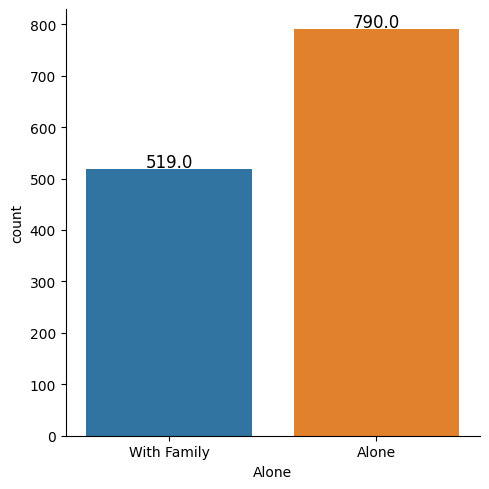

In [489]:
# Create the count plot
plot = sns.catplot(x='Alone', data=df, kind='count')

# Annotate the bars with count values
for p in plot.ax.patches:
    plot.ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()


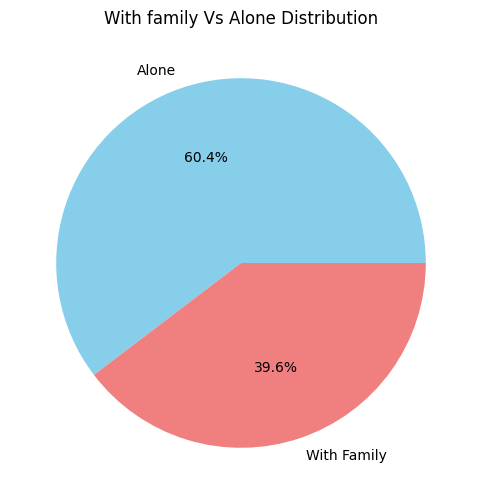

In [490]:
import matplotlib.pyplot as plt

# Count the values of 'Alone' column
alone_counts = df['Alone'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(alone_counts, labels=alone_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('With family Vs Alone Distribution')
plt.show()


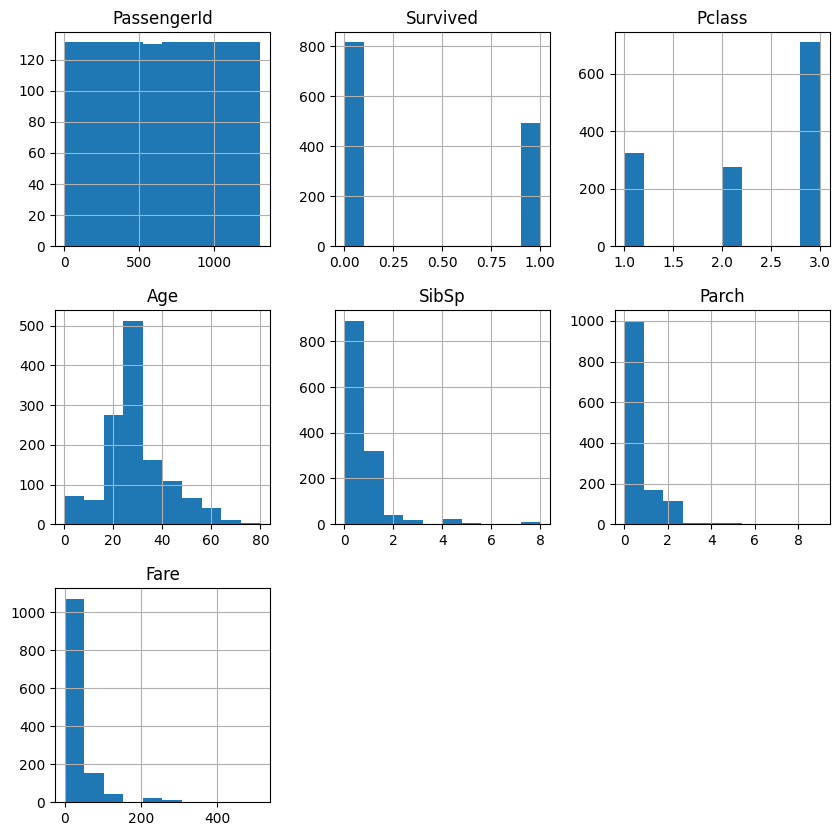

In [491]:
df.hist (figsize=(10,10))
plt.show()


In [492]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report


In [493]:
# Select features and target variable
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']


In [494]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [495]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1047, 7), (262, 7), (1047,), (262,))

In [496]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report


# Preprocessing for numerical data (scaling)
numerical_features = ['Age', 'Fare']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
numerical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [497]:
# Preprocessing for categorical data (one-hot encoding)
categorical_features = ['Sex', 'Embarked']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
categorical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [498]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Embarked'])])

In [499]:
# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model

RandomForestClassifier(random_state=42)

In [500]:
# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)])
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [501]:
# Fit the model
clf.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [502]:
# Predictions on the test set
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1],
      dtype=int64)

In [503]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.8206106870229007

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       159
           1       0.76      0.79      0.78       103

    accuracy                           0.82       262
   macro avg       0.81      0.81      0.81       262
weighted avg       0.82      0.82      0.82       262



In [504]:
# Feature importance
if hasattr(model, 'feature_importances_'):
    feature_importances = model.feature_importances_
    feature_names = list(X_train.columns)
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    print("\nFeature Importance:\n", importance_df)



Feature Importance:
     Feature  Importance
1       Sex    0.297884
2       Age    0.263337
0    Pclass    0.222985
3     SibSp    0.198917
4     Parch    0.007762
6  Embarked    0.006264
5      Fare    0.002851
